In [48]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score,plot_roc_curve


In [3]:
data = pd.read_csv('final_train.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,explanation why the edits made under my userna...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,more i ca not make any real suggestions on im...,0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,sir hero chance remember page


In [4]:
data.isna().sum()

comment_text          0
malignant             0
highly_malignant      0
rude                  0
threat                0
abuse                 0
loathe                0
clean_comment       129
dtype: int64

In [5]:
data.dropna(inplace = True)

In [6]:
data.isna().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
clean_comment       0
dtype: int64

In [15]:
tfidf = TfidfVectorizer()

feature1 = tfidf.fit_transform(data['clean_comment'])

In [16]:
X = feature1
y = data['malignant']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 42)

In [20]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = model.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43238
           1       0.99      0.18      0.30      4595

    accuracy                           0.92     47833
   macro avg       0.95      0.59      0.63     47833
weighted avg       0.93      0.92      0.89     47833



In [24]:
model2 = ComplementNB()
model2.fit(X_train, y_train)

ComplementNB()

In [25]:
y_preds = model2.predict(X_test)

In [26]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     43238
           1       0.71      0.47      0.57      4595

    accuracy                           0.93     47833
   macro avg       0.83      0.72      0.76     47833
weighted avg       0.92      0.93      0.92     47833



In [43]:
model3 = AdaBoostClassifier(ComplementNB())
model3.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=ComplementNB())

In [44]:
y_pred_ada = model3.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43238
           1       0.88      0.16      0.28      4595

    accuracy                           0.92     47833
   macro avg       0.90      0.58      0.62     47833
weighted avg       0.91      0.92      0.89     47833



[[42371   867]
 [ 2438  2157]]


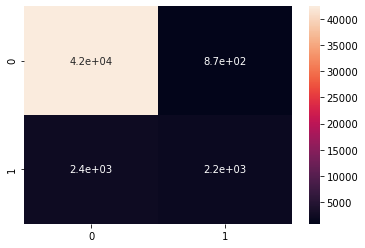

In [49]:
conf = confusion_matrix(y_test, y_preds)
sns.heatmap(conf,
           annot = True);
print(conf)

In [50]:
import joblib
joblib.dump(model3, 'malginant-classification.pkl')

['malginant-classification.pkl']